In [1]:
# importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


sns.set(style = 'white')



In [3]:
df= pd.read_csv(r"C:\Users\User\Downloads\Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# checking the columns in the data

df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# checking statistical analysis of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#Removing missing values 
df.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = df.iloc[:,1:]

#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [19]:
# Converting all 'True' to 1 and 'False' to 0
df_dummies = df_dummies.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [21]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

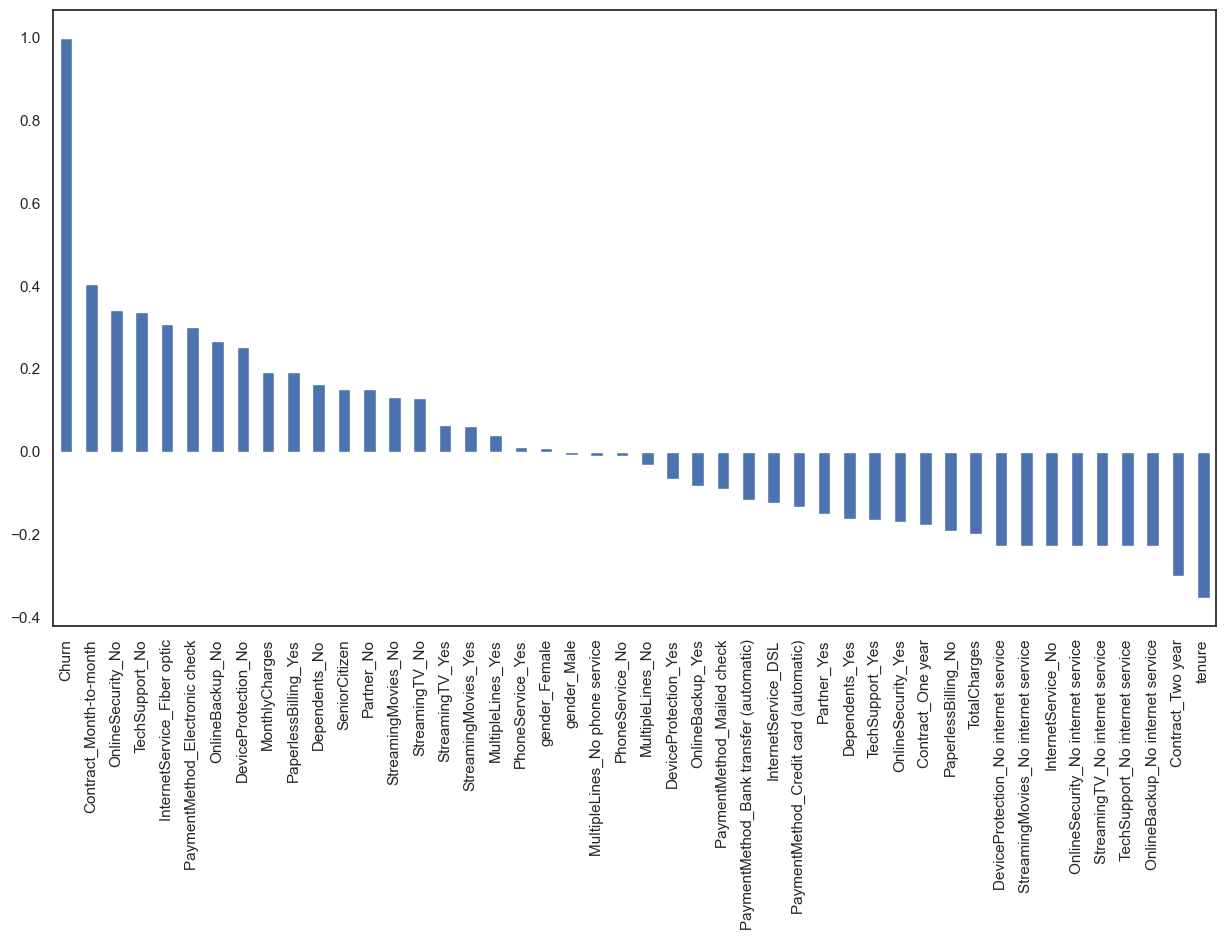

In [23]:
#Getting Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
plt.savefig('Correlation between Churn and other variables')
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## EDA

### A.) Demographics - Let us first understand the gender, age range, patner and dependent status of the customers

Gender Distribution (Counts):
gender
Male      3549
Female    3483
Name: count, dtype: int64

Gender Distribution (Percentages):
gender
Male      50.469283
Female    49.530717
Name: count, dtype: float64


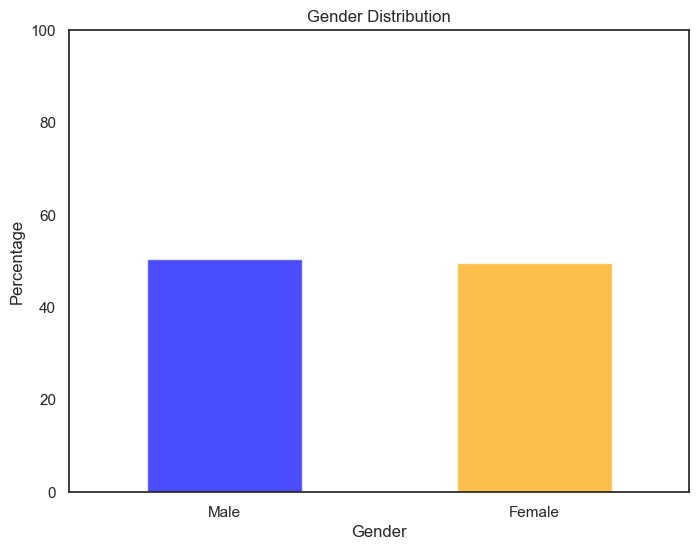

In [13]:
gender_counts = df['gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Display the gender distribution
print("Gender Distribution (Counts):")
print(gender_counts)
print("\nGender Distribution (Percentages):")
print(gender_percentages)

# Plotting the gender distribution in a bar chart
plt.figure(figsize=(8, 6))
gender_percentages.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set the y-axis limit to 100 for percentage representation
plt.show()

Gender Distribution - The diagram above show that about half of the customers in our data set are males while the other half are females


#### Percentage of Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

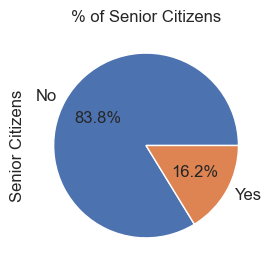

In [60]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,3), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)


The piechart above show percentage distribution of senior citizens.  There are only 16% of the customers who are senior citizens. Thus most of the customers in the data are younger people.

Churn Distribution (Counts):
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn Distribution (Percentages):
Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64


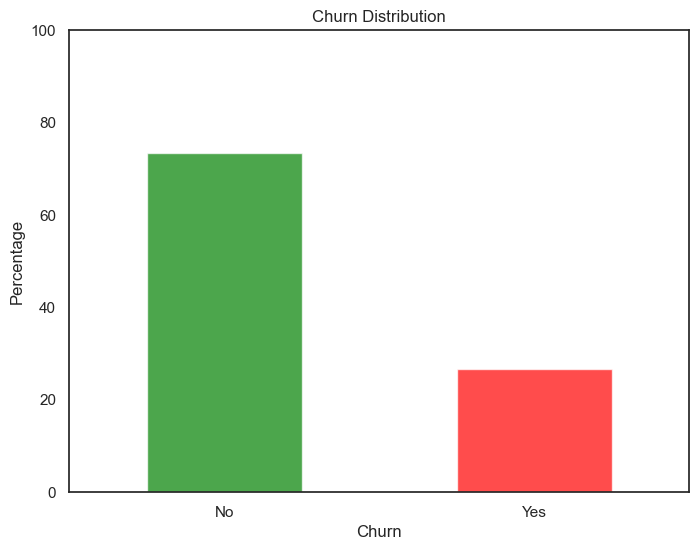

In [63]:
# Churn Distribution

Churn_counts = df['Churn'].value_counts()
Churn_percentages = Churn_counts / Churn_counts.sum() * 100

# Display the response distribution
print("Churn Distribution (Counts):")
print(Churn_counts)
print("\nChurn Distribution (Percentages):")
print(Churn_percentages)

# Plotting the response distribution in a bar chart
plt.figure(figsize=(8, 6))
Churn_percentages.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.savefig('Churn Distribution')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set the y-axis limit to 100 for percentage representation
plt.show()

The bar chart above shows the number of customers churning (1869) as well as the percentage (26.5)

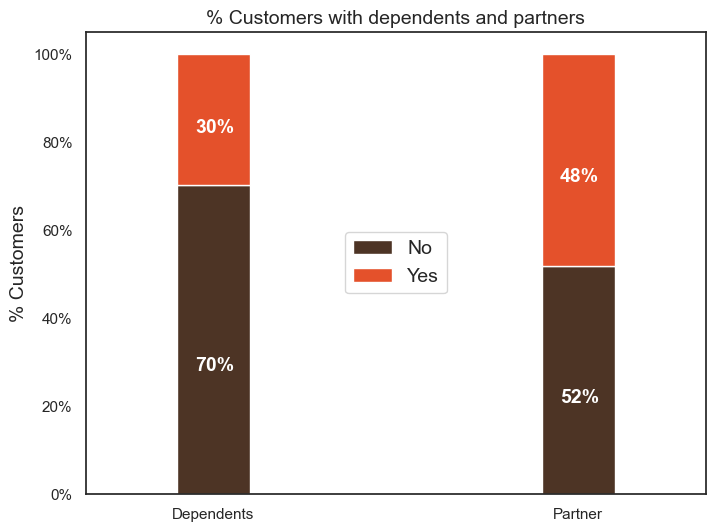

In [66]:
# checking the percentage distribution of customers that have dependents and partners

df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

From the diagram above, 30% of customers have dependents and 48% have partners

Text(0.5, 1.0, 'Number of Customers by their tenure')

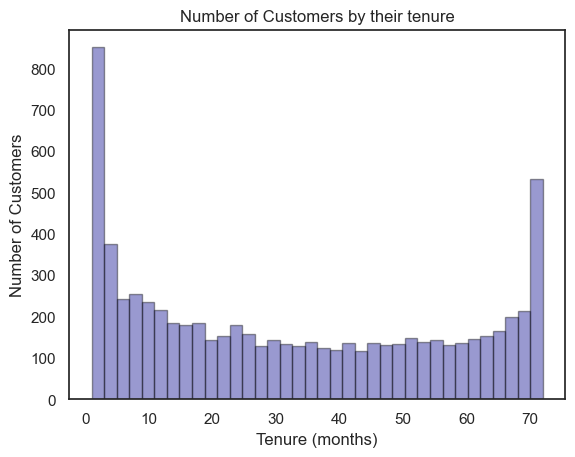

In [69]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by their tenure')

The histogram above shows that majority of the customers have been with the company for just one month while many have been there for about 72 months.

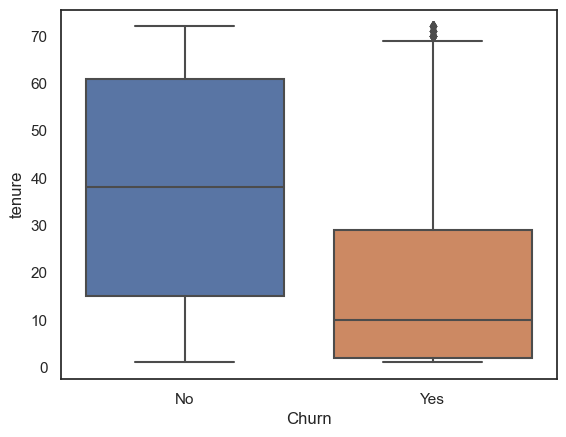

In [72]:
# Churn vs tenure
sns.boxplot(x=df.Churn, y=df.tenure)
plt.savefig('Churn Vs Tenure')

The boxplot above shows that customers who do not cancel their subscription tend to stay for longer periods with the company

Churn by Contract Type (Counts):
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1306   166
Two year        1637    48

Churn by Contract Type (Percentages):
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


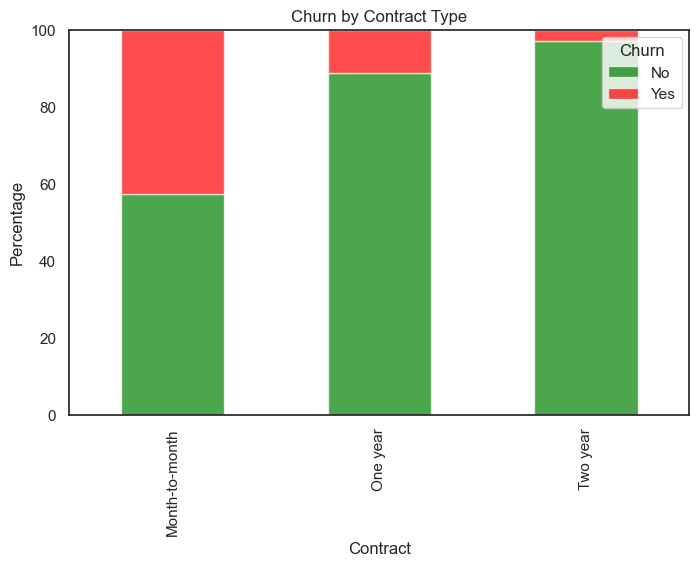

In [75]:
# Churn vs contract type


churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Calculate churn percentages by contract type
Churn_percentages = churn_by_contract.div(churn_by_contract.sum(axis=1), axis=0) * 100

# Display the churn by contract type
print("Churn by Contract Type (Counts):")
print(churn_by_contract)
print("\nChurn by Contract Type (Percentages):")
print(Churn_percentages)

# Plotting the churn by contract type in a stacked bar chart
Churn_percentages.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7, figsize=(8, 5))

# Adding labels and title
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.ylim(0, 100)  # Set the y-axis limit to 100 for percentage representation

# Show the plot
plt.savefig('Churn Vs Contract type')
plt.show()

Customers who have month-month contracts have a very high rate of churn

Churn by Citizen Type (Counts):
Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476

Churn by Citizen Type (Percentages):
Churn                 No        Yes
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


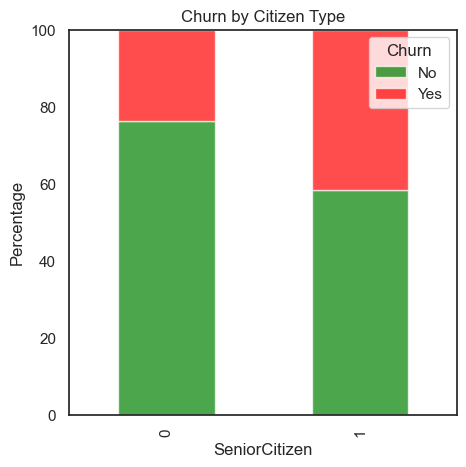

In [80]:
# Churn vs Seniority

churn_by_seniority = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate churn percentages by contract type
churn_percentages = churn_by_seniority.div(churn_by_seniority.sum(axis=1), axis=0) * 100

# Display the churn by contract type
print("Churn by Citizen Type (Counts):")
print(churn_by_seniority)
print("\nChurn by Citizen Type (Percentages):")
print(churn_percentages)

# Plotting the churn by contract type in a stacked bar chart
churn_percentages.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7, figsize=(5, 5))

# Adding labels and title
plt.title('Churn by Citizen Type')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.ylim(0, 100)  # Set the y-axis limit to 100 for percentage representation

# Save and Show the plot
plt.savefig('Churn Vs Citizen type')
plt.show()

The diagram above shows that churn rate in senior citizens is almost double those of younger citizens

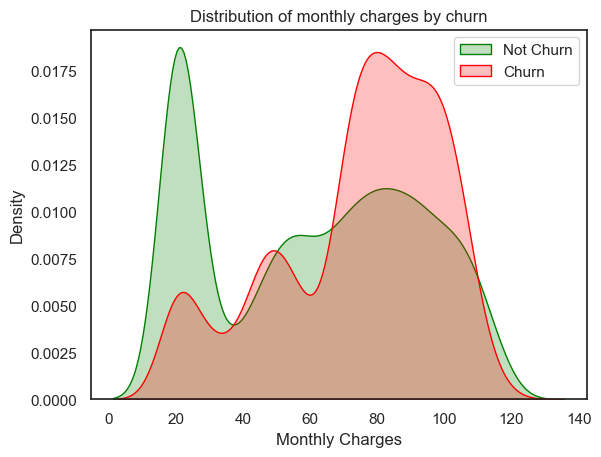

In [83]:
# Churn vs Monthly charges

ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Green", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
# save the fig
plt.savefig('Churn Vs Monthly Charges')

The graph above shows that higher percentage of customers cancel their subscription when the monthly charges are high

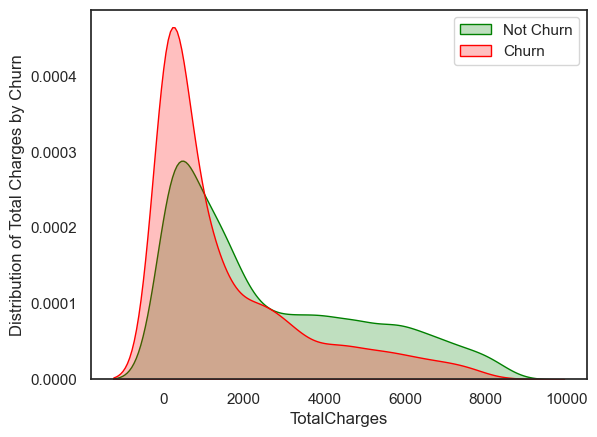

In [86]:
# Churn vs total charges

ax= sns.kdeplot(df.TotalCharges[(df['Churn']=='No')], 
                color= 'green', shade= True)

ax= sns.kdeplot(df.TotalCharges[(df['Churn']=='Yes')], 
                ax=ax, color= 'red', shade= True)
ax.legend(['Not Churn', 'Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_ylabel('Total Charges')
ax.set_ylabel('Distribution of Total Charges by Churn')

# save the fig
plt.savefig('Churn Vs Total Charges')

The diagram above shows there higher cancellations when total charges are lower

### Encoding categorical variables

In [145]:
# Convert all 'True' to 1 and 'False' to 0
df_dummies = df_dummies.applymap(lambda x: 1 if x is True else (0 if x is False else x))



In [147]:
df_dummies.head()

,SeniorCitizen,tenure,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure_group,scaled_mc,scaled_tc,scaled_tmci,scaled_ltc
0,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0-12,0.115423,0.001275,0.001295,0.075353
1,0,34,0,0,1,1,0,1,0,0,...,2,0,0,0,0,24-48,0.385075,0.215867,0.224763,0.751403
2,0,2,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0-12,0.354229,0.010310,0.010421,0.285172
3,0,45,0,0,1,1,0,1,0,1,...,2,2,0,0,0,24-48,0.239303,0.210241,0.220919,0.747142
4,0,2,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0-12,0.521891,0.015330,0.014371,0.340270


In [149]:
# Label Encoding for binary categorical variables
# Import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

binary_categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


label_encoder = LabelEncoder()
for feature in binary_categorical_features:
    df_dummies[feature] = label_encoder.fit_transform(df[feature])
    
# save the fig
plt.savefig('Label Encoded Table')    
    
df_dummies.head()    
    


,SeniorCitizen,tenure,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure_group,scaled_mc,scaled_tc,scaled_tmci,scaled_ltc
0,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0-12,0.115423,0.001275,0.001295,0.075353
1,0,34,0,0,1,1,0,1,0,0,...,2,0,0,0,0,24-48,0.385075,0.215867,0.224763,0.751403
2,0,2,1,0,1,1,0,1,0,0,...,0,0,0,0,1,0-12,0.354229,0.010310,0.010421,0.285172
3,0,45,0,0,1,1,0,1,0,1,...,2,2,0,0,0,24-48,0.239303,0.210241,0.220919,0.747142
4,0,2,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0-12,0.521891,0.015330,0.014371,0.340270


<Figure size 640x480 with 0 Axes>

In [153]:
# Creating new features from existing features

# 1. Create an interaction feature between tenure and MonthlyCharges
#df_dummies['tenure_monthlycharges_interaction'] = df_dummies['tenure'] * df_dummies['MonthlyCharges']

# 2. Binning tenure into groups
#df_dummies['tenure_group'] = pd.cut(df_dummies['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

# 3. Log-transformed TotalCharges to reduce skewness
#df_dummies['log_totalcharges'] = np.log(df_dummies['TotalCharges'].replace(0, np.nan)).fillna(0)

# Display the resulting DataFrame with new features
#df_dummies

### Model selection, training, and validation

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [157]:
df_dummies.head(2)

,SeniorCitizen,tenure,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure_group,scaled_mc,scaled_tc,scaled_tmci,scaled_ltc
0,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0-12,0.115423,0.001275,0.001295,0.075353
1,0,34,0,0,1,1,0,1,0,0,...,2,0,0,0,0,24-48,0.385075,0.215867,0.224763,0.751403


In [162]:
# Drop rows with NaN values in 'log_totalcharges'
#df_dummies.dropna(subset=['log_totalcharges'], inplace=True)

# Drop original 'tenure_group' column as it is categorical
df_dummies = df_dummies.drop(columns=['tenure_group'])

In [164]:
# Define feature matrix X and target vector y

X = df_dummies.drop(columns=['Churn'])
y = df_dummies['Churn']


In [166]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
# Initialize models

log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

#### Logistic Regression

In [175]:
# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg)}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg)}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg)}\n")

Logistic Regression:
Accuracy: 0.7938877043354655
Precision: 0.6468531468531469
Recall: 0.4946524064171123
F1-Score: 0.5606060606060607



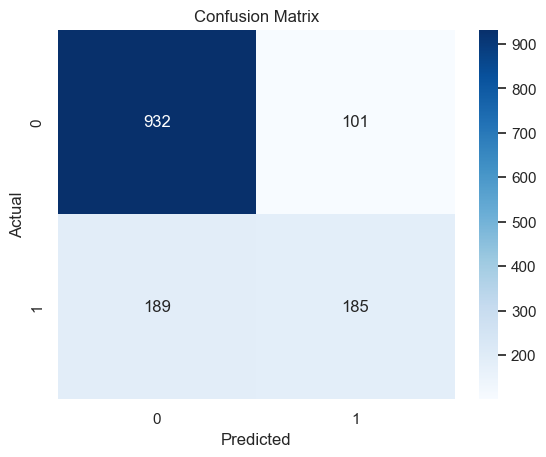

In [219]:

from sklearn.metrics import confusion_matrix

# Create confusion matrix
lr_cm = confusion_matrix(y_test, y_pred_log_reg)

# Visualize the confusion matrix
#sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d' ,  xticklabels=['Predicted 0', 'Predicted 1'], 
        #    yticklabels=['Actual 0', 'Actual 1'])

lr_cm= confusion_matrix(y_test, y_pred_log_reg)

#visualize the confusion matrix
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt= 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()





932 True Negatives (TN): The model correctly identified 932 negative cases.

101 False Negatives (FN): The model missed 101 positive cases, predicting them as negative.

189 False Positives (FP): The model incorrectly predicted 189 cases as positive.

185 True Positives (TP): The model missed 185 positive cases, predicting them as negative.

To explain the above better, the confusion matrix shows that, of all the customers that do not churn, 932 were accurately predicted 
to not churn (TN), while 101 were incorrectly predicted to not churn (FN). On the other hand, of all the customers that churned, 185 were accurately predicted to churn (TP), and 189 incorrectly predicted to churn(FP).

#### Random Forest

In [221]:
# Train and evaluate Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf)}\n")


Random Forest:
Accuracy: 0.7874911158493249
Precision: 0.6353790613718412
Recall: 0.47058823529411764
F1-Score: 0.5407066052227342



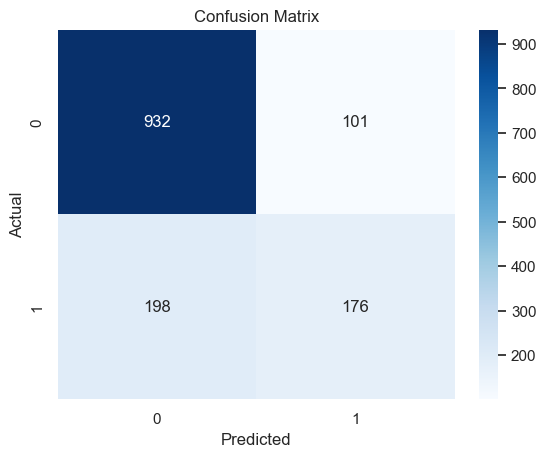

In [223]:
# Create a confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
#sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
#plt.show()

rf_cm= confusion_matrix(y_test, y_pred_rf)

#visualize the confusion matrix
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt= 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

932 True Negatives (TN): The model correctly identified 932 negative cases.

101 False Negatives (FN): The model missed 101 positive cases, predicting them as negative.

198 False Positives (FP): The model incorrectly predicted 198 cases as positive.

176 True Positives (TP): The model missed 176 positive cases, predicting them as negative.

To explain the above better, the confusion matrix shows that, of all the customers that do not churn, 932 were accurately predicted to not churn (TN), while 101 were incorrectly predicted to not churn (FN). On the other hand, of all the customers that churned, 176 were accurately predicted to churn (TP), and 198 incorrectly predicted to churn(FP).

#### Support Vector Machine

In [226]:
# Train and evaluate SVM

svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm)}")

Support Vector Machine:
Accuracy: 0.7853589196872779
Precision: 0.6276595744680851
Recall: 0.4732620320855615
F1-Score: 0.5396341463414634


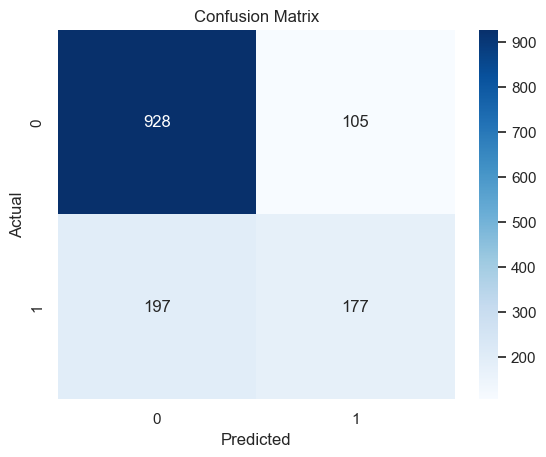

In [228]:
# Create a confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix
#sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g')
#plt.show()

svm_cm= confusion_matrix(y_test, y_pred_svm)

#visualize the confusion matrix
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt= 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

928 True Negatives (TN): The model correctly identified 932 negative cases.

105 False Negatives (FN): The model missed 101 positive cases, predicting them as negative.

197 False Positives (FP): The model incorrectly predicted 198 cases as positive.

177 True Positives (TP): The model missed 176 positive cases, predicting them as negative.

To explain the above better, the confusion matrix shows that, of all the customers that do not churn, 928 were accurately predicted to not churn (TN), while 105 were incorrectly predicted to not churn (FN). On the other hand, of all the customers that churned, 176 were accurately predicted to churn (TP), and 197 incorrectly predicted to churn(FP).

### Analysis
Accuracy- Logistic Regression has the highest accuracy (0.79), indicating it has the highest overall correct predictions.
while Random Forest and SVM have equal accuracies of (0.78)

Precision- Logistic Regression again has the highest precision (0.64), meaning it has the highest ratio of true positive predictions to total positive predictions. This indicates fewer false positives.
Random forest  has a precision of 0.63.
Logistic Regression has the lowest precision (0.62).

Recall- Logistic Regression has the highest recall (0.49), meaning it has the highest ratio of true positive predictions to actual positives. This indicates fewer false negatives.
SVM has a recall of 0.47.
Random Forest has the lowest recall (0.46).

F1-Score- Logistic Regression has the highest F1-score (0.56), which balances both precision and recall.
Both Random Forest and SVM stand at (0.53)

Conclusion:
Logistic Rgression performs the best across all metrics, indicating it provides the best balance between precision and recall, and has the highest overall accuracy. This makes it a robust choice for this dataset.
Random Forest also performs well but slightly below Logistic Regression in all metrics.
SVM performs the worst among the three models, but still provides reasonably good performance as its results are very close to those of Random Forest.

Recommendation:

When choosing the best model, consider the specific context and requirements of your application:

If the cost of false positives is high, prioritize precision.
If the cost of false negatives is high, prioritize recall.
If you need a balance of both, look at the F1-score.
In this case, the Random Forest model is the best performer, making it the most suitable choice based on the provided metrics.





